# Inference in Pyro: From Stochastic Functions to Marginal Distributions

In [2]:
# import some dependencies
import numpy as np
import matplotlib.pyplot as plt

import torch

import pyro
import pyro.infer
import pyro.optim
import pyro.distributions as dist

torch.manual_seed(101);

In [3]:
def scale(guess):
    # The prior over weight encodes our uncertainty about our guess
    weight = pyro.sample("weight", dist.Normal(guess, 1.0))
    # This encodes our belief about the noisiness of the scale:
    # the measurement fluctuates around the true weight
    return pyro.sample("measurement", dist.Normal(weight, 0.75))

In [8]:
posterior = pyro.infer.Importance(scale, num_samples=100)

In [16]:
guess = 8

marginal = pyro.infer.EmpiricalMarginal(posterior.run(guess))
print(marginal())

tensor(8.4590)


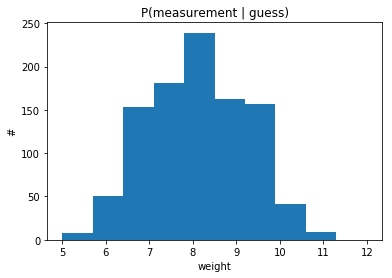

In [18]:
plt.hist([marginal().item() for _ in range(1000)], range=(5.0, 12.0))
plt.title("P(measurement | guess)")
plt.xlabel("weight")
plt.ylabel("#");

## Conditioning Models on Data

In [22]:
def scale2(guess):
    weight = pyro.sample('weight', dist.normal(guess, 1.))
    tolerance = torch.abs(pyro.sample('tolerance', dist.normal(0.,1.)))
    measurement = pyro.sample('measurement', dist.normal(weight, tolerance))
    return measurement

In [28]:
conditioned_scale2_1 = pyro.condition(scale2, data = {'weight':9.2,'measurement' : 9.5})

tensor(8.7149)


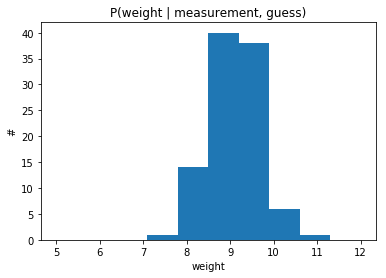

In [29]:
guess = 8.5
measurement = 9.5

conditioned_scale = pyro.condition(scale, data={"measurement": measurement})

marginal = pyro.infer.EmpiricalMarginal(
    pyro.infer.Importance(conditioned_scale, num_samples=100).run(guess), sites="weight")

# The marginal distribution concentrates around the data
print(marginal())
plt.hist([marginal().item() for _ in range(100)], range=(5.0, 12.0))
plt.title("P(weight | measurement, guess)")
plt.xlabel("weight")
plt.ylabel("#");